In [11]:
#Importing the required libraries

import numpy as np
import pandas as pd
import visuals as vs
from sklearn.model_selection import ShuffleSplit
#Visualization
%matplotlib inline

#Loading the dataset

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

#Success
print ('Boston housing dataset has {} data points with {} variables each'.format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each


# Data Exploration

In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

### Calculate Descriptive Statistics

To get a basic idea of the spread of the data, will start with some descriptive statistics about Boston housing prices.

In [2]:
#Minimum price of the data
minimum_price = np.min(prices)

#Maximum price of the data
maximum_price = np.max(prices)

#Mean price of the data
mean_price = np.mean(prices)

#Median price of the data
median_price = np.median(prices)

#Standard Deviation of prices of the data
std_prices = np.std(prices)

#Show the calculated statistics

print ('Statistics for Boston housing dataset: \n')
print ('Minimum price : ${}'.format (minimum_price))
print ('Maximum price: ${}'.format(maximum_price))
print ('Mean price: ${}'.format(mean_price))
print ('Median price: ${}'.format(median_price))
print ('SD of prices: ${}'.format(std_prices))


Statistics for Boston housing dataset: 

Minimum price : $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price: $438900.0
SD of prices: $165171.13154429477


# Feature Observation

As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
- 'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

- 'RM': An increase in the value of this feature will likely increase the value of 'MEDV' given that the increase in square footage or rooms typically increases the overall price of a home.
- 'LSTAT': An increase in the value of this feature will likely decrease the value of 'MEDV'; due to those earning less money would not likely be able to afford expensive homes, and less expensive homes available in areas with higher percentages of individuals that are considered "working poor".
- 'PTRATIO': An increase in the value of this feature will likely decrease the value of 'MEDV', due to a higher student to teacher ratio is more often associated with schools that lack resources essential for a better learning environment.

In order to test our initial intuition, the scatterplots below will give more insight.

Testing intuition with scatterplots

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


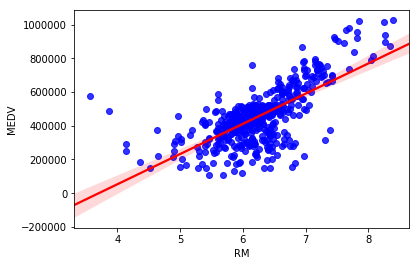

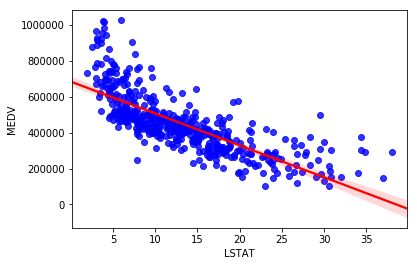

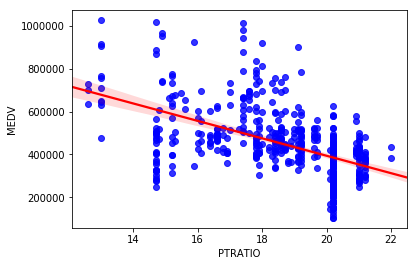

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

for var in features.columns:
    sns.regplot(data[var], prices, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'})
    plt.show()

# Developing a Model

In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Define a Performance Metric

For this project, we will be calculating the coefficient of determination, R^2, to measure the performance of the model. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.

Below we will define a function that returns the r2 score for given true and predicted data.

In [4]:
#Import R^2_score
from sklearn.metrics import r2_score

def performance_metric (y_true, y_predicts):
    """ Calculates and returns the performance score between
    true and predicted values based on the metric chosen. """
    
    #Calculate the performance score between y_true and y_predict
    score = r2_score (y_true, y_predicts)
    
    #Returnt the score
    return score

# Goodness of Fit

Assume that a dataset contains five data points and a model made the following predictions for the target variable:

True Value	Prediction
3.0	2.5
-0.5 0.0
2.0	2.1
7.0	7.8
4.2	5.3
Below the model's coefficient of determination is calculated.

In [5]:
#Calculate the performance of this model

score = performance_metric ([3, -0.5, 2,7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Model has a coefficient of determination, R^2, of 0.923.

This model has successfully captured the variation of the target variable with a coefficient of determination, (R2), of 0.923, or 92.3%. The best outcome is a score of 1, and the least favorable is a score of zero, so this outcome is very favorable.

## Shuffle and Split Data

Next, the Boston housing dataset will be split into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.


In [6]:
#Import train test split

from sklearn.model_selection import train_test_split

#Shuffle and split the data into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split (features, prices, test_size = 0.2, random_state = 90)

#Success

print ("Training and testing split was successful")

Training and testing split was successful


# Training and Testing

Splitting a dataset into testing and training subsets allows for the data to properly train then evaluate the performance on new data (testing). It is imperative to use both a training and testing set, to evaluate the true performance of the model on unseen data to avoid issues such as overfitting, which is the model may do very well on training, but poorly on testing since the model simply memorized the seen data. Another issue in failing to use testing and training subsets is underfitting, which is the model does poorly on both the training and testing sets.

## Analyzing Model Performance
In this next section, We'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate the Decision Tree algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

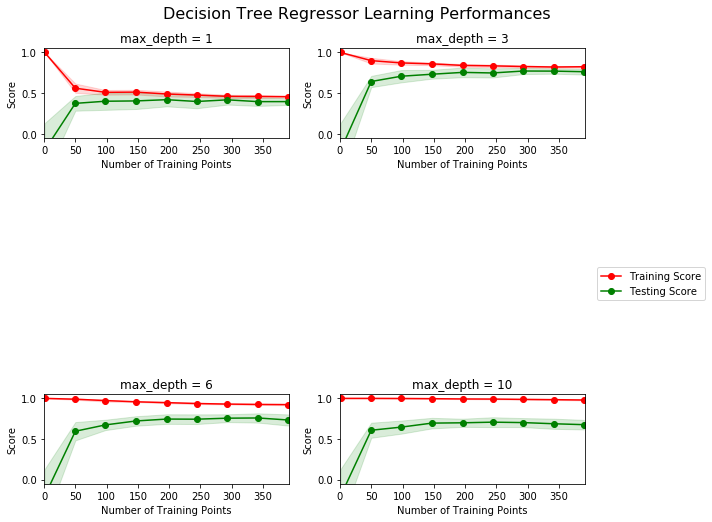

In [12]:
#Produce the learning curve for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

## Learning the Data
In reference to the model with a max_depth=3.

The score of the training curve decreases with the increase of training points. With fewer training points the model can better predict or approximate the targets, but as the number of training points increases, fitting the targets becomes more difficult for the model and thus the score decreases.

The score of the testing curve increases with the addition of training points, but there appears to be a slight decrease in the data after adding 250 points. As the model receives more training points, the model will perform better in predicting training points. The training and testing curve seem to be converging to a score of 0.7 or 0.8. The model at that point is stabilizing, and adding more points may not benefit the model any further. In conclusion, adding more training points may not benefit the model (with max_depth of 3).

## Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

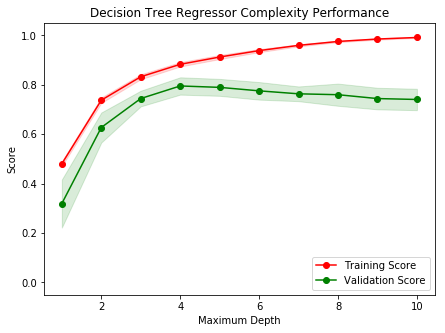

In [13]:
vs.ModelComplexity(X_train, y_train)

## Bias-Variance Tradeoff
Model trained with max_depth of 1: This model is showing signs of high bias. Looking at the graph, both training and validation scores are low. This appears to be underfitting, which is the data performs poorly in training and testing, and is unable to generalize the data.

Model trained with max_depth of 10: This model is showing signs of high variance and appears to be overfitting on the training data. Looking at the graph, the training score at this depth is nearly equal to 1.0, while the validation score is lower. The scores are then diverging away from one another, which shows the new data (unseen) introduced has not been learned.

## Best-Guess Optimal Model
The model with a max depth of 3 is the model that best generalizes unseen data. At this depth, the training and testing scores remain relatively high and converging at a point as the model learns and generalizes. A lower depth model underfits the data, while a model with a higher depth of 3, overfits.

## Evaluating Model Performance
In this final section, we will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

## Grid Search
Grid searching technique scans the data to determine the best or optimal parameters for a machine learning model. This takes out additional time for guess-work on what values are best. To optimize a learning algorithm, grid search can be applied by specifying the parameters and the possible values of the parameters. The grid search then returns the best parameter values for the model, after fitting the supplied data.

## Cross-Validation
The k-fold cross-validation training technique splits the dataset into k partitions of equal size, and then runs k separate learning experiments on the training data. In each of the experiments, a training set is chosen of the size of k-1 partitions, train the model on that partition, and evaluate the results on the remaining test data. The results/scores for the k experiments are then averaged.

## Fitting a Model
Everything will be brought together and trained the model trained via a supervised learning technique called decision tree algorithm. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model (X,y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    #Cross validation
    CV_sets = ShuffleSplit (n_splits = 10, test_size = 0.20, random_state = 0)
    
    #Decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    #Dictionary for the parameter "max_depth" with a range from 1 to 10
    params = {'max_depth': range (1,11)}
    
    #Transform 'Performance metric' into a scoring function using 'make_score'
    scoring_func = make_scorer (performance_metric)
    
    #GridSearchCV
    grid = GridSearchCV (regressor, params, scoring_func, cv=CV_sets)
    
    #Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X,y)
    
    #Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.

## Optimal Model

In [20]:
#Fit the training data to the model
reg = fit_model(X_train, y_train)

#Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format (reg.get_params ()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


## Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

Feature	Client 1	Client 2	Client 3
Total number of rooms in home	5 rooms	4 rooms	8 rooms
Neighborhood poverty level (as %)	17%	32%	3%
Student-teacher ratio of nearby schools	15-to-1	22-to-1	12-to-1

In [21]:
#Produce a matrix for client data

client_data = [[5,17,15], #Client 1
              [4,32,22], #Client 2
              [8,3,12]] #Client 3

#Show predictions

for i, price in enumerate (reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format (i+1, price))

Predicted selling price for Client 1's home: $404,400.00
Predicted selling price for Client 2's home: $215,411.54
Predicted selling price for Client 3's home: $940,961.54


## Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

In [22]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61
